In [1]:
#we import libraries as necessary
import pandas as pd
import re
import src.columns as col
import src.manipulating_df as man
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#we wil import our previously cleaned worldwide_emissions cvs file to take conclusions out of it
world_emissions=man.open_cvs()

Please, enter the name for the cvs file you want to open without extension:
world_emissions


In [9]:
world_emissions.head()

,Year,CO2_Tonnes,Year_interval
0,1751,9350528.0,<=1700
1,1752,18704720.0,<=1700
2,1753,28058912.0,<=1700
3,1754,37416768.0,<=1700
4,1755,46778288.0,<=1700


In [14]:
world_emissions["Year_interval"] =pd.cut(world_emissions['Year'],[-1700,1800,1900,2000,2050],labels=['<=1700','1800','1900','2000'])
world_emissions_years=world_emissions.groupby(['Year_interval']).agg({"CO2_Tonnes":"sum"})
world_emissions_years

,CO2_Tonnes
Year_interval,
<=1700,1.614617e+10
1800,1.032128e+12
1900,3.428968e+13
2000,2.216000e+13


,CO2_Tonnes,Emissions_per_year
Year_interval,,
<=1700,1.614617e+10,1.437449e+15
1800,1.032128e+12,1.437449e+15
1900,3.428968e+13,1.437449e+15
2000,2.216000e+13,1.437449e+15


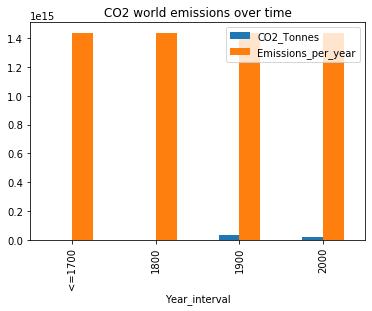

In [17]:
world_emissions_years['Emissions_per_year']=round(world_emissions_years['CO2_Tonnes'].sum()/len(world_emissions_years['CO2_Tonnes'])*100,2)
display(world_emissions_years)
world_emissions_years.plot.bar(title='CO2 world emissions over time')